# **Chapter 3 신경망**

앞 장에서는 퍼셉트론의 가중치를 사람이 수동으로 정해주었다. 하지만 신경망이 이 번거로움을 해결해준다. 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 신경망의 중요한 성질이다.

## **3.1 퍼셉트론에서 신경망으로**

신경망에는 입력층, 은닉층, 출력층이 있다. 은닉층의 뉴런은 입력층, 출력층과는 달리 사람 눈에 보이지 않는다. 

### **3.1.2 퍼셉트론 복습**

편향: 뉴런이 얼마나 쉽게 활성화되느냐를 제어

가중치: 각 신호의 영향력을 제어

### **3.1.3 활성화 함수의 등장**

입력 신호의 총합을 출력 신호로 변환하는 함수를 활성화 함수라고 한다. 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 한다. 

## **3.2 활성화 함수**

임계값을 경계로 출력이 바뀌는 함수를 계단 함수라고 한다.

### **3.2.1 시그모이드 함수**

h(x) = 1 / (x + exp(-x))

### **3.2.2 계단 함수 구현하기**

In [0]:
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

계단 함수를 구현했다. 그러나 위의 경우 인수 x로 실수(부동소수점)만 받아들인다. 넘파이 배열을 인수로 넣을 수는 없다.

In [0]:
def step_function(x):
  y = x>0
  return y.astype(np.int)

넘파이 배열도 지원하도록 수정했다. 

In [0]:
import numpy as np
x = np.array([-1.0,1.0,2.0])
x

array([-1.,  1.,  2.])

In [0]:
y = x>0
y

array([False,  True,  True])

넘파이 배열에 부등호 연산을 수행했더니 원소 각각이 0보다 크면 True, 0 이하면 False로 변환한 새로운 배열이 생성되었다.

In [0]:
y=y.astype(np.int)
y

array([0, 1, 1])

넘파이 배열의 자료형을 변환하기 위해 astype() 메서드를 이용했다. bool을 int로 변환하면 True는 1로, False는 0으로 변환된다. 

### **3.2.3 계단 함수의 그래프**

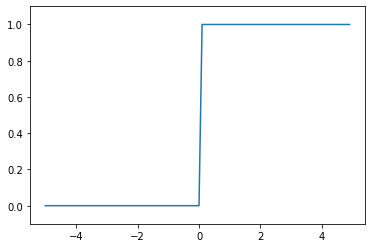

In [0]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x>0,dtype=np.int)

x=np.arange(-5.0,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) #y축의 범위를 지정해주었다.
plt.show()

0을 경계로 출력이 0에서 1로 바뀌는 것을 알 수 있다.

### **3.2.4 시그모이드 함수 구현하기**

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

여기서는 인수 x가 넘파이 배열이어도 올바른 결과가 나온다.

In [0]:
x=np.array([-1.0,1.0,2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

이렇게 넘파이 배열도 잘 처리되는 이유는 넘파이의 브로드캐스트 때문이다. 브로드캐스트 기능이란 넘파이 배여로가 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행하는 것이다. 

In [0]:
t = np.array([1.0,2.0,3.0])

In [0]:
1.0+t

array([2., 3., 4.])

In [0]:
1.0/t

array([1.        , 0.5       , 0.33333333])

스칼라값과 넘파이 배열의 각 원소 사이에서 연산이 이뤄지고, 연산 겨로가가 넘파이 배열로 출력되었다.

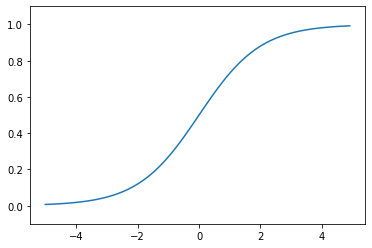

In [0]:
x = np.arange(-5.0,5.0,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) #y축 범위 지정
plt.show()

### **3.2.5 시그모이드 함수와 계단 함수의 비교**

시그모이드 함수와 계단 함수는 매끄러움에 차이가 있다. 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화하는 반면 계단 함수는 0을 경계로 출력이 갑자기 바뀐다. 

퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흘렀다면, 신경망에서는 연속적인 실수가 흐른다.

### **3.2.6 비선형 함수**

계단 함수와 시그모이드 함수의 공통점은 둘 다 비선형 함수라는 것이다. 

신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다. 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문이다. 선형 함수의 문제는 층을 아무리 깊게 해도 은닉층이 없는 네트워크로도 똑같은 기능을 할 수 있다는 데 있다. 예를 들어 h(x)=cx 를 활성화함수로 사용하는 3층 네트워크는 y(x)=cccx 처럼 곱셈을 세번 수행하지만, 실은 y(x)=ax 와 똑같은 식이다. 

### **3.2.7 ReLU 함수**

입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수이다.

In [0]:
def relu(x):
  return np.maximum(0,x)

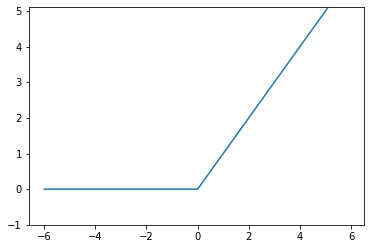

In [0]:
x = np.arange(-6.0,6.0,0.1)
y=relu(x)
plt.plot(x,y)
plt.ylim(-1,5.1) #y축 범위 지정
plt.show()

## **3.3 다차원 배열의 계산**

### **3.3.1 다차원 배열**

다차원 배열도 그 기본은 숫자의 집합이다. 숫자가 한 줄로 늘어선 것이나 직사각형으로 늘어놓은 것, 3차원으로 늘어놓은 것이나 일반화하여 N차원으로 나열하는 것을 모두 통틀어 다차원 배열이라고 한다.

In [0]:
import numpy as np
A=np.array([1,2,3,4])

In [0]:
print(A)

[1 2 3 4]


In [0]:
np.ndim(A)

1

배열의 차원 수를 확인했다.

In [0]:
A.shape

(4,)

배열의 형상을 확인했다. A.shaper은 1차원 배열이라도 다차원 배열일 때와 통일된 형태로 결과를 반환하기 위해 튜플을 반환한다.

In [0]:
A.shape[0]

4

In [0]:
B=np.array([[1,2],[3,4],[5,6]])

3x2 배열을 작성했다. 3x2 배열은 처음 차원에는 원소가 3개, 다음 차원에는 원소가 2개 있다는 의미이다.

2차원 배열은 특히 행렬이라고 부르고 배열의 가로 방향을 행, 세로 방향을 열이라고 한다.

In [0]:
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [0]:
np.ndim(B)

2

In [0]:
B.shape

(3, 2)

### **3.3.2 행렬의 곱**

In [0]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [0]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [0]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [0]:
np.dot(B,A)

array([[23, 34],
       [31, 46]])

np.dot()은 입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬 곱을 계산한다. 행렬의 곱에서는 피연산자의 순서가 다르면 결과가 다르기 때문에 np.dot(A,B)와 np.dot(B,A)의 결과가 다르게 나온 것이다.

In [0]:
A=np.array([[1,2,3],[4,5,6]])
A.shape

(2, 3)

In [0]:
B=np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [0]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

2x3 행렬과 3x2 행렬의 곱을 구현했다.

In [0]:
C=np.array([[1,2],[3,4]])
C.shape

(2, 2)

In [0]:
A.shape

(2, 3)

In [0]:
np.dot(A,C)

ValueError: ignored

행렬 A의 1번째 차원의 원소 수(열 수)와 행렬 C의 0번째 차원의 원소 수(행 수)가 달라 행렬의 곱을 계산할 수 없다.

In [0]:
A = np.array([[1,2],[3,4],[5,6]])
A.shape

(3, 2)

In [0]:
B = np.array([7,8])
B.shape

(2,)

In [0]:
np.dot(A,B)

array([23, 53, 83])

B가 1차원 배열이지만 대응하는 차원의 원소 수를 일치시켰기 때문에 계산을 할 수 있었다.

### **3.3.3 신경망에서의 행렬 곱**

In [0]:
X=np.array([1,2])
X.shape

(2,)

In [0]:
W=np.array([[1,3,5],[2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [0]:
W.shape

(2, 3)

In [0]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


## **3.4 3층 신경망 구현하기**

### **3.4.1 표기법 설명**

교재 p.83~84 참고

### **3.4.2 각 층의 신호 전달 구현하기**

교재 p.84~88와 코드 함께 보기

In [0]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

In [0]:
print(W1.shape)

(2, 3)


In [0]:
print(X.shape)

(2,)


W1은 2x3 행렬, X는 원소가 2개인 1차원 배열로 W1과 X의 대응하는 차원의 원소 수가 일치한다.

In [0]:
print(B1.shape)

(3,)


In [0]:
A1 = np.dot(X,W1) + B1

가중치를 곱한 신호에 편향을 합한 값을 A1에 저장했다.

In [0]:
Z1 = sigmoid(A1)

In [0]:
print(A1)

[0.3 0.7 1.1]


In [0]:
print(Z1)

[0.57444252 0.66818777 0.75026011]


가중 신호와 편향의 총합을 활성화 함수를 통해 변환시켰다. 활성화 함수로는 앞서 정의한 시그모이드 함수를 사용했다.

In [0]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

In [0]:
print(Z1.shape)

(3,)


In [0]:
print(W2.shape)

(3, 2)


In [0]:
print(B2.shape)

(2,)


In [0]:
A2 = np.dot(Z1,W2) +B2
Z2 = sigmoid(A2)

1층에서 2층으로 가는 과정을 구현했다. 1층의 출력 Z1이 2층의 입력이 된다는 점을 제외하면 이전 구현과 동일하다.

In [0]:
def identity_function(x):
  return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) +B3
Y = identity_function(A3)

2층에서 출력층으로의 과정을 구현했다. 활성화 함수로 항등 함수를 이용한 것을 제외하면 지금까지의 구현과 거의 같다. 앞의 흐름과 통일하기 위해 identity_function()을 정의해주었지만 결국 입력을 그대로 출력해주기 때문에 굳이 정의하지 않아도 된다. 

### **3.4.3 구현 정리**

In [0]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
  network['b1'] = np.array([0.1,0.2,0.3])
  network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
  network['b2'] = np.array([0.1,0.2])
  network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
  network['b3'] = np.array([0.1,0.2])

  return network

def forward(network,x):
  W1,W2,W3 = network['W1'],network['W2'],network['W3']
  b1,b2,b3 = network['b1'],network['b2'],network['b3']

  a1 = np.dot(x,W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1,W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2,W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0,0.5])
y = forward(network,x)
print(y)

[0.31682708 0.69627909]


init_network() 함수는 가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장했다. 딕셔너리 변수 network에는 각 층에 필요한 매개변수(가중치와 편향)를 저장했다. 그리고 forward() 함수는 입력 신호를 출력으로 변환하는 처리 과정을 구현하고 있다. 

## **3.5 출력층 설계하기**

신경망은 분류와 회귀 모두에 이용할 수 있다. 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다. 일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용한다.

### **3.5.1 항등 함수와 소프트맥스 함수 구현하기**

항등 함수는 입력을 그대로 출력한다. 소프트맥스 함수의 경우 분자는 k번째 입력 신호의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합으로 이루어져 있다.


In [0]:
a = np.array([0.3,2.9,4.0])

exp_a = np.exp(a) #지수 함수
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [0]:
sum_exp_a = np.sum(exp_a) #지수 함수의 합
print(sum_exp_a)

74.1221542101633


In [0]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


소프트맥스 함수를 구현해보았다.

In [0]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  
  return y

위의 논리 흐름을 파이썬 함수로 정의하여, 앞으로 필요할 때 사용할 수 있도록 했다.

### **3.5.2 소프트맥스 함수 구현 시 주의점**

앞에서 구현 한 소프트맥스 함수 코드는 컴퓨터로 계산할 때 오버플로 문제가 생긴다. 소프트맥스 함수는 지수 함수를 사용하는데, 지수 함수는 쉽게 아주 큰 값을 내뱉는다. 그리고 그런 큰 값끼리 나눗셈을 하면 결과 수치가 불안정해진다. 

소프트맥스 함수 구현을 개선한 것은 교재 p.93 참고

In [0]:
a = np.array([1010,1000,990])
np.exp(a)/np.sum(np.exp(a)) #소프트맥스 함수의 계산

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

제대로 계산이 되지 않고 nan(not a number의 약자)이 출력되었다. 

In [0]:
c = np.max(a)
a - c

array([  0, -10, -20])

올바르게 계산하기 위해 입력 신호 중 최댓값을 빼주었다.

In [0]:
np.exp(a-c)/np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

정상적으로 계산이 되는 것을 확인했다.

In [0]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  
  return y

개선된 소프트맥스 함수를 다시 구현해보았다.

### **3.5.3 소프트맥수 함수의 특징**

In [0]:
a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


softmax() 함수를 이용해 신경망의 출력을 계산했다. 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수이다.

In [0]:
np.sum(y)

1.0

출력의 총합은 1이다. 이러한 성질 덕분에 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다.
___
소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다. 지수 함수 y=exp(x)가 단조 증가 함수이기 때문이다. 실제로 a에서 가장 큰 원소는 2번째 원소이고, y에서 가장 큰 원소도 마찬가지로 2번째 원소이다. 
___
신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다. 그리고 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다. 그래서 신경망으로 분류할 때 지수 함수 계산에 드는 자원 낭비를 줄이고자 출력층의 소프트맥스 함수를 생략하는 것이 일반적이다.


### **3.5.4 출력층의 뉴런 수 정하기**

출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 한다. 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다.

## **3.6 손글씨 숫자 인식**

### **3.6.1 MNIST 데이터셋**